In [1]:
#%matplotlib inline
import ROOT
ROOT.gSystem.Load("/home/dhruv/RooUnfold/libRooUnfold")
from ROOT import gRandom, TH1, TH1D, cout
#for unfolding
from ROOT import RooUnfoldResponse
from ROOT import RooUnfold
from ROOT import RooUnfoldBayes
from ROOT import RooUnfoldSvd
from ROOT import RooUnfoldTUnfold
#plotting, style
from matplotlib import pyplot as plt
ROOT.gStyle.SetOptStat('')
from AtlasCommonUtils import SetAtlasStyle
#from Legend import Legend
from ROOT import TLatex
from array import array
SetAtlasStyle()
ROOT.gStyle.SetPalette(ROOT.kViridis);
#numpy
import numpy as np


Welcome to JupyROOT 6.16/00


### Get Data and MC files

In [2]:
#pp
#MCfile_name = '/home/dhruv/16k5a_16_37bins_publishedBinning20GeV_1Mevents_noNormalize_allReco.root'
#MCfile_name = '/home/dhruv/17l3b_16_9bins_1GeV20GeV_1Mevents_noNormalize_allReco.root'
#MCfile_name = '/home/dhruv/17l3b_16_37bins_publishedBinning20GeV_1Mevents_noNormalize_allReco.root'
#MCfile_name = '/home/dhruv/17l3_16_37bins_publishedBinning20GeV_1Mevents_noNormalize_allReco.root'
#MCfile_name = '/home/dhruv/17l4_16_37bins_publishedBinning20GeV_1Mevents_noNormalize_allReco.root'
#MCfile_name = '/home/dhruv/16k5a_16_37bins_publishedBinning20GeV_1Mevents_noNormalize_allReco.root'
#MCfile_name = '/home/dhruv/16k5a_3_37bins_publishedBinning20GeV_10Mevents_noNormalize_allReco.root'
#MCfile_name = '/home/dhruv/16k5a_1_37bins_publishedBinning20GeV_100Kevents_noNormalize_publishedCuts.root'
MCfile_name = '/home/dhruv/16k5a_1_37bins_publishedBinning20GeV_1Mevents_normalizeRecoAll_publishedCuts.root'

#Datafile_name = '/home/dhruv/fout_16_9bins_17p_new_1GeV20GeV_tracking_addedPileUp_trigCut_1Mevents_noNormalize.root'
#Datafile_name = '/home/dhruv/fout_16_37bins_17p_new_publishedBinning20GeV_tracking_addedPileUp_trigCut_1Mevents_noNormalize.root'
#Datafile_name = '/home/dhruv/fout_16_37bins_17p_282030_publishedBinning20GeV_tracking_addedPileUp_trigCut1_removeNtrack_1Mevents_normalizeByEventOnly.root'
#Datafile_name = '/home/dhruv/fout_16_37bins_17p_3run_sameTrig_publishedBinning20GeV_tracking_addedPileUp_kINT8_removeNtrack_100Kevents_normalizeByEventOnly.root'
#Datafile_name = '/home/dhruv/fout_16_37bins_17p_3run_sameTrig_pppublishedBinning_tracking_17pkINT7_1MKevents_normalizeByEventOnly.root'
#Datafile_name = '/home/dhruv/fout_16_37bins_17p_3run_sameTrig_pppublishedBinning_tracking_defaultkINT7_1MKevents_normalizeByEventOnly.root'
#Datafile_name = '/home/dhruv/fout_16_37bins_15n_1run_pppublishedBinning_tracking_kINT7_1MKevents_normalizeByEventOnly.root'
#Datafile_name = '/home/dhruv/fout_16_37bins_15n_1run_pass3_pppublishedBinning_tracking_kINT7_1MKevents_normalizeByEventOnly.root'
#Datafile_name = '/home/dhruv/fout_16_37bins_15n_1run_pass3_new_pppublishedBinning_tracking_kINT7_Allevents_normalizeByEventOnly_wIncompDAQ.root'


#Datafile_name = '/home/dhruv/fout_3_37bins_15n_1run_pppublishedBinning_tracking_kINT7_1MKevents_normalizeByEventOnly.root'
#Datafile_name = '/home/dhruv/fout_3_37bins_15n_1run_pass3_pppublishedBinning_tracking_kINT7_1MKevents_normalizeByEventOnly.root'
#Datafile_name = '/home/dhruv/fout_3_37bins_15n_1run_pass3_new_pppublishedBinning_tracking_kINT7_Allevents_normalizeByEventOnly_wIncompDAQ.root'
#Datafile_name = '/home/dhruv/fout_3_37bins_15n_r244411_pppublishedBinning_tracking_kINT7_100kevents_normalizeByEventOnly.root'

#Datafile_name = '/home/dhruv/fout_3_37bins_15n_r244480_pppublishedBinning_tracking_kINT7_100kevents_normalizeByEventOnly.root'
#Datafile_name = '/home/dhruv/fout_3_37bins_15n_r244480_allCuts_pppublishedBinning_tracking_kINT7_100kevents_normalizeByEventOnly.root'
#Datafile_name = '/home/dhruv/fout_3_37bins_15n_r244480_onlyNoteCuts_pppublishedBinning_tracking_kINT7_100kevents_normalizeByEventOnly.root'
#Datafile_name = '/home/dhruv/fout_1_37bins_15n_r244480_onlyNoteCuts_pppublishedBinning_tracking_nokINT7_100kevents_normalizeByEventOnly.root'
#Datafile_name = '/home/dhruv/fout_3_37bins_15n_r244480_pppublishedBinning_tracking_kINT7_100kevents_normalizeByEventOnly.root'
#Datafile_name = '/home/dhruv/fout_3_37bins_15n_r244480_pppublishedBinning_tracking_nokINT7_100kevents_normalizeByEventOnly.root'

#Datafile_name = '/home/dhruv/fout_3_37bins_15n_r244540_pppublishedBinning_tracking_kINT7_100kevents_normalizeByEventOnly.root'

#Datafile_name = '/home/dhruv/fout_1_37bins_15n_r244351_looseCuts_pppublishedBinning_tracking_nokINT7_100kevents_normalizeByEventOnly.root'
#Datafile_name = '/home/dhruv/fout_1_37bins_15n_r244364_looseCuts_pppublishedBinning_tracking_nokINT7_100kevents_normalizeByEventOnly.root'
#Datafile_name = '/home/dhruv/fout_1_37bins_15n_r244480_looseCuts_pppublishedBinning_tracking_nokINT7_100kevents_normalizeByEventOnly.root'

#Datafile_name = '/home/dhruv/fout_1_37bins_15n_r244351_looseCuts_pppublishedBinning_tracking_notkINT7_100kevents_normalizeByEventOnly.root'
#Datafile_name = '/home/dhruv/fout_1_37bins_15n_r244364_looseCuts_pppublishedBinning_tracking_notkINT7_100kevents_normalizeByEventOnly.root'
#Datafile_name = '/home/dhruv/fout_1_37bins_15n_r244480_looseCuts_pppublishedBinning_tracking_notkINT7_100kevents_normalizeByEventOnly.root'

#Datafile_name = '/home/dhruv/fout_1_37bins_15n_r244351_looseCuts_pppublishedBinning_tracking_kINT7_100kevents_normalizeByEventOnly.root'
#Datafile_name = '/home/dhruv/fout_1_37bins_15n_r244480_looseCuts_pppublishedBinning_tracking_kINT7_100kevents_normalizeByEventOnly.root'

#Datafile_name = '/home/dhruv/fout_1_37bins_15n_r244364_looseCuts_pppublishedBinning_tracking_kINT7_100kevents_normalizeByEventOnly.root'
Datafile_name = '/home/dhruv/fout_1_37bins_15n_r244364_looseCuts_pppublishedBinning_tracking_kINT7_100kevents_normalizeByEventOnly_normalEventSelection_zCutsFirst_Zcorr.root'
#Datafile_name = '/home/dhruv/fout_1_37bins_15n_r244364_looseCuts_pppublishedBinning_tracking_kINT7_100kevents_normalizeByEventOnly_normalEventSelection_zCutsLast_Zcorr.root'
#Datafile_name = '/home/dhruv/fout_1_37bins_15n_r244351_looseCuts_pppublishedBinning_tracking_kINT7_100kevents_normalizeByEventOnly_normalEventSelection_zCutsFirst_Zcorr.root'
#Datafile_name = '/home/dhruv/fout_1_37bins_15n_r244351_looseCuts_pppublishedBinning_tracking_kINT7_100kevents_normalizeByEventOnly_normalEventSelection_zCutsLast_Zcorr.root'
#Datafile_name = '/home/dhruv/fout_1_37bins_15n_r244480_looseCuts_pppublishedBinning_tracking_kINT7_100kevents_normalizeByEventOnly_normalEventSelection_zCutsFirst_Zcorr.root'
#Datafile_name = '/home/dhruv/fout_1_37bins_15n_r244480_looseCuts_pppublishedBinning_tracking_kINT7_100kevents_normalizeByEventOnly_normalEventSelection_zCutsLast_Zcorr.root'

#Datafile_name = '/home/dhruv/fout_1_37bins_15n_r244351_looseCuts_pppublishedBinning_tracking_kINT7_100kevents_normalizeByEventOnly_normalEventSelection_zCutsFirst_Zcorr_spdEventCuts.root'
#Datafile_name = '/home/dhruv/fout_1_37bins_15n_r244351_looseCuts_pppublishedBinning_tracking_kINT7_100kevents_normalizeByEventOnly_normalEventSelection_zCutsLast_Zcorr_spdEventCuts.root'
#Datafile_name = '/home/dhruv/fout_1_37bins_15n_r244480_looseCuts_pppublishedBinning_tracking_kINT7_100kevents_normalizeByEventOnly_normalEventSelection_zCutsFirst_Zcorr_spdEventCuts.root'
#Datafile_name = '/home/dhruv/fout_1_37bins_15n_r244480_looseCuts_pppublishedBinning_tracking_kINT7_100kevents_normalizeByEventOnly_normalEventSelection_zCutsLast_Zcorr_spdEventCuts.root'

MCfile = ROOT.TFile(MCfile_name)
Datafile = ROOT.TFile(Datafile_name)

## Data: measured and published spectra

### Measured data

1 17123.0 130.85488145269935
2 31154.0 176.50495743746123
3 32058.0 179.0474797365213
4 30795.0 175.48504209761012
5 28786.998046875 169.66732154425023
6 25393.0 159.3518120386461
7 21718.0 147.37028194313805
8 17725.0 133.13526955694348
9 15084.0 122.81693694275232
10 12784.0 113.06635220082056
11 10435.0 102.1518477561713
12 8949.0 94.59915433025814
13 7704.00048828125 87.77243302996675
14 6676.0 81.70679286326198
15 5897.0 76.79192665899195
16 4946.0 70.32780389006896
17 4563.0 67.54998149518622
18 7759.0 88.08518604169488
19 6268.0 79.17070165155795
20 9358.0 96.73675619949223
21 6304.0 79.39773296511684
22 4314.0 65.68104749469211
23 2994.0 54.71745608121781
24 2164.0 46.518813398452025
25 1481.0 38.48376280978771
26 1154.0 33.97057550292606
27 788.0 28.071337695236398
28 594.0 24.372115213907882
29 499.0 22.338307903688676
30 623.0 24.95996794869737
31 384.0 19.595917942265423
32 430.0 20.73644135332772
33 163.0 12.767145334803704
34 111.0 10.535653752852738
35 29.999998092651367

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


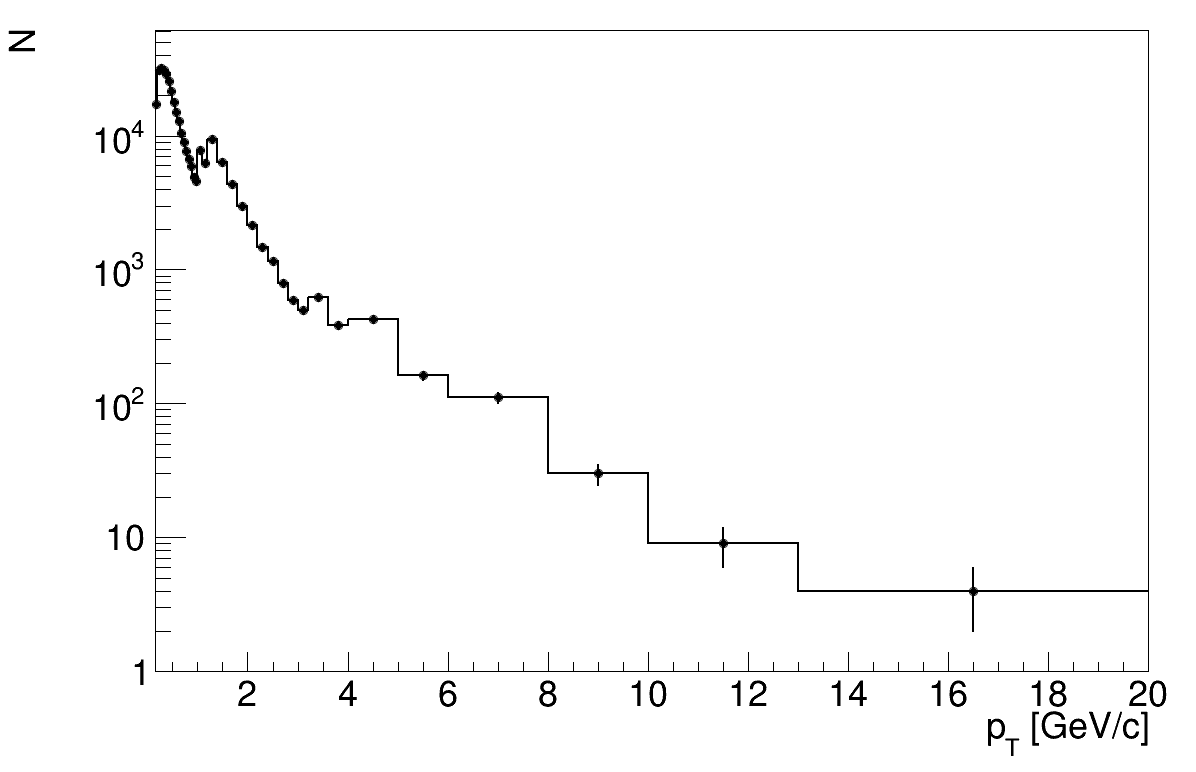

In [118]:
#data = MCfile.Get('hReco_all')

data = Datafile.Get('hReco')
data.ClearUnderflowAndOverflow()
data.SetLineColor(ROOT.kBlack)
data.SetMarkerColor(ROOT.kBlack)
data.SetMarkerStyle(20)
#data.GetXaxis().SetRangeUser(1,20)
data.SetTitle(';p_{T} [GeV/c];N')

normalizer = Datafile.Get('hNormalizer')
numEvents = normalizer.GetBinContent(1)
for i in range(1, data.GetNbinsX()+1):
    temp = data.GetBinContent(i)
    tempErr = data.GetBinError(i)
    data.SetBinContent(i, temp*numEvents )
    data.SetBinError(i, tempErr*numEvents)
    print (i, data.GetBinContent(i), data.GetBinError(i))
print (numEvents)

#data_mc = MCfile.Get('hReco_all')
#data_mc.SetLineColor(ROOT.kBlue)
#data_mc.SetMarkerColor(ROOT.kBlue)
#data_mc.SetMarkerStyle(20)
#data_mc.Scale(data.Integral()/data_mc.Integral())
#print data_mc.Integral()
#print data.Integral()

c = ROOT.TCanvas('c','c',1200,800)
data.Draw('histe')
#data_mc.Draw('histesame')
ROOT.gPad.SetLogy()
c.Draw()
#c.SaveAs('dataSpectrum_tracking_4Layers_pPb_tpc_all_noZ_13c.png')

### Published Data 

In [119]:
nbinstrack = 9
track_bins = np.array([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 8.0, 10.0, 13.0, 20.0], dtype='float64')
published_content = np.array([4.70E-01, 9.80E-02, 1.58E-02, 4.52E-03, 1.59E-03, 
                              4.90E-04, 1.27E-04, 3.64E-05, 6.66E-06], dtype='float64')
published_error = np.array([1.41E-04, 6.16E-05, 1.73E-05, 5.26E-06, 3.08E-06, 
                            1.20E-06, 6.04E-07, 2.63E-07, 7.34E-08], dtype='float64')

In [120]:
nbinstrack = 37
track_bins = np.array([0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 
                       0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 
                       0.95, 1  , 1.1 , 1.2, 1.4 , 1.6, 1.8 , 2  , 
                       2.2 , 2.4, 2.6 , 2.8, 3   , 3.2, 3.6 , 4  , 
                       5   , 6  , 8   , 10 , 13  , 20], dtype='float64')
published_content = np.array([3.38E-01, 3.46E-01, 3.28E-01, 3.01E-01, 2.70E-01, 2.40E-01, 2.11E-01, 1.85E-01, 
                              1.62E-01, 1.42E-01, 1.25E-01, 1.10E-01, 9.70E-02, 8.58E-02, 7.61E-02, 6.77E-02, 
                              6.05E-02, 1.02E-01, 8.14E-02, 1.18E-01, 7.87E-02, 5.32E-02, 3.66E-02, 2.54E-02, 
                              1.80E-02, 1.29E-02, 9.35E-03, 6.85E-03, 5.10E-03, 6.71E-03, 3.96E-03, 4.52E-03, 
                              1.59E-03, 9.80E-04, 2.53E-04, 1.09E-04, 4.66E-05], dtype='float64')
published_error = np.array([7.05E-05, 4.91E-05, 4.53E-05, 4.21E-05, 3.90E-05, 3.63E-05, 3.44E-05, 3.03E-05, 
                            3.15E-05, 3.01E-05, 2.90E-05, 2.76E-05, 2.64E-05, 2.52E-05, 2.41E-05, 2.30E-05, 
                            2.17E-05, 2.81E-05, 2.49E-05, 2.92E-05, 2.36E-05, 1.92E-05, 1.58E-05, 2.65E-05, 
                            1.11E-05, 9.31E-06, 7.90E-06, 6.73E-06, 5.78E-06, 6.51E-06, 4.97E-06, 5.26E-06, 
                            3.08E-06, 2.39E-06, 1.21E-06, 7.89E-07, 5.13E-07], dtype='float64')

76519.0
62862.0
0 0.0 0.0
1 41381.4765625 8.631343200000002
2 42360.91796875 6.011332640000001
3 40157.171875 5.546097120000001
4 36851.55078125 5.15431984
5 33056.20703125 4.7747855999999995
6 29383.296875 4.44422352
7 25832.814453125 4.21160576
8 22649.623046875 3.70964112
9 19833.724609375 3.8565576000000004
10 17385.1171875 3.68515504
11 15303.7998046875 3.5504816000000003
12 13467.34375 3.37907904
13 11875.7490234375 3.2321625600000004
14 10504.5283203125 3.08524608
15 9316.953125 2.9505726400000003
16 8288.5380859375 2.8158992
17 7407.0390625 2.65673968
18 12487.900390625 3.44029424
19 9965.8349609375 3.0485169599999997
20 14446.787109375 3.5749676800000003
21 9635.2724609375 2.8893574400000004
22 6513.29736328125 2.35066368
23 4480.95263671875 1.9344003200000002
24 3109.732177734375 3.2444056
25 2203.747314453125 1.3589774400000003
26 1579.3521728515625 1.1398270240000001
27 1144.7242431640625 0.9672001600000001
28 838.6482543945312 0.823956592
29 624.39501953125 0.707647712
30 

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


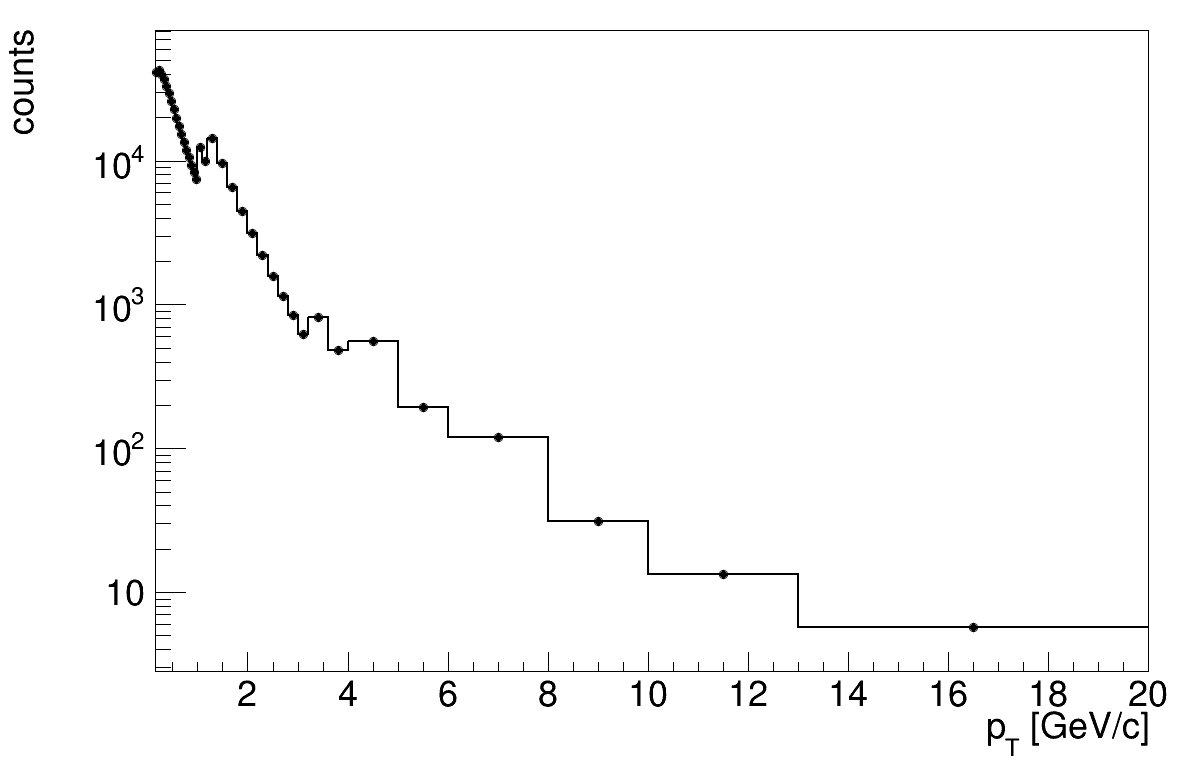

In [121]:
h = ROOT.TH1F('binned_data','', nbinstrack, track_bins)

normalizer = Datafile.Get('hNormalizer')
numEvents = normalizer.GetBinContent(1)
tot_eta = 1.6#normalizer.GetBinContent(2)
print (normalizer.GetBinContent(1))
print (normalizer.GetBinContent(2))
for i in range(nbinstrack):
    h.SetBinContent(i+1, published_content[i]*tot_eta*numEvents)
    h.SetBinError(i+1, published_error[i]*tot_eta*numEvents)
    print (i, h.GetBinContent(i), h.GetBinError(i))
h.SetLineColor(ROOT.kBlack)
h.SetMarkerColor(ROOT.kBlack)
h.SetMarkerStyle(20)
h.SetTitle(';p_{T} [GeV/c];counts')

#h = MCfile.Get('hTruth')


#h_mc = MCfile.Get('hTruth')
#h_mc.Scale(h.Integral()/h_mc.Integral())
#print h.Integral()
#print h_mc.Integral()
#h_mc.SetLineColor(ROOT.kBlue)
#h_mc.SetMarkerColor(ROOT.kBlue)
#h_mc.SetMarkerStyle(20)

c= ROOT.TCanvas('c','c',1200,800)
h.Draw('histe')
#h_mc.Draw('histesame')
c.SetLogy()
c.Draw()

## Get response Matrix, normalize it, plot it

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


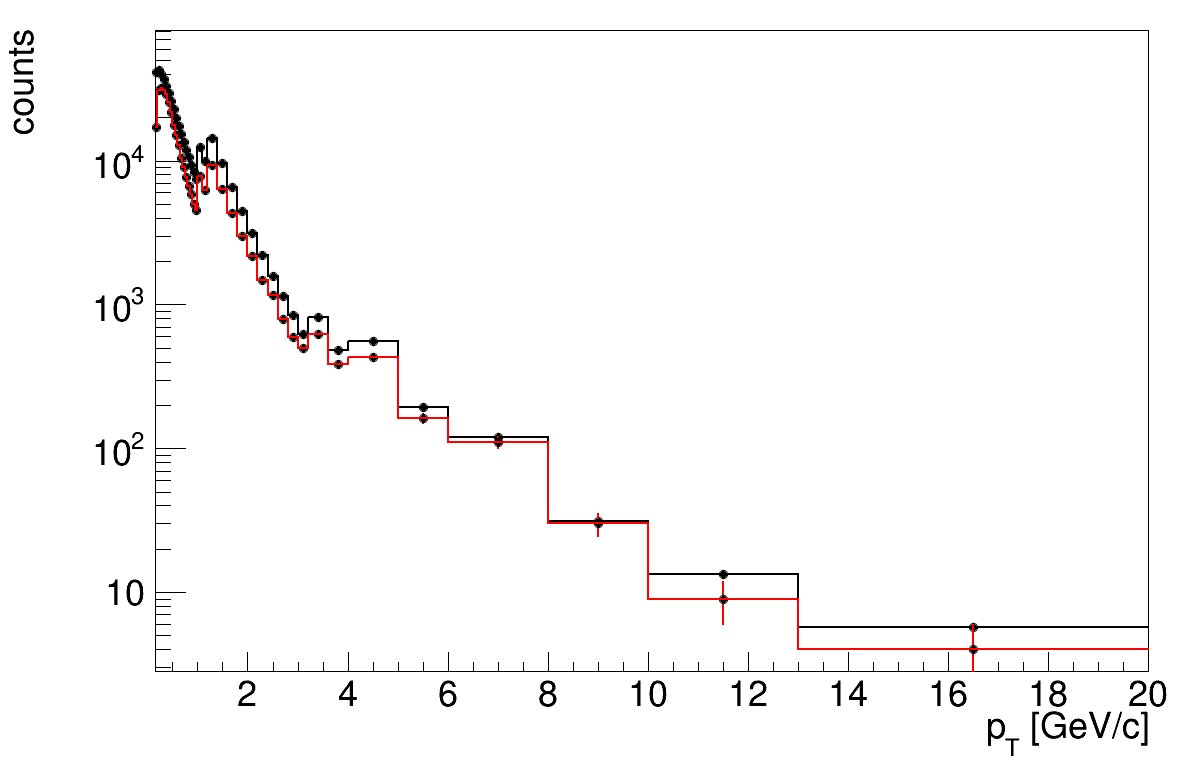

In [122]:
h.SetLineColor(1)
data.SetLineColor(2)

#mc_reco_counts.SetLineColor(3)
#mc_truth_counts.SetLineColor(4)
#data_mc = MCfile.Get('hReco_all')
#data_mc.SetLineColor(ROOT.kBlue)
#data_mc.SetMarkerColor(ROOT.kBlue)
#data_mc.SetMarkerStyle(20)

c= ROOT.TCanvas('c','c',1200,800)
h.Draw('histe')
data.Draw('histesame')
#data_mc.Draw('histesame')
#mc_reco_counts.Draw('histesame')
#mc_truth_counts.Draw('histesame')
c.SetLogy()

#label = Legend("")
#label.Add(mc_reco_counts,'MC Reco','L')
#label.Add(mc_truth_counts,'MC True','L')
#label.Add(h,'published data','L')
#label.Add(data,'measured data','L')
#label.Add(data_mc,'mc reco','L')

#label.Draw(0.5,.87)
c.Draw()
#c.SaveAs('dataVsMCNew.png')

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


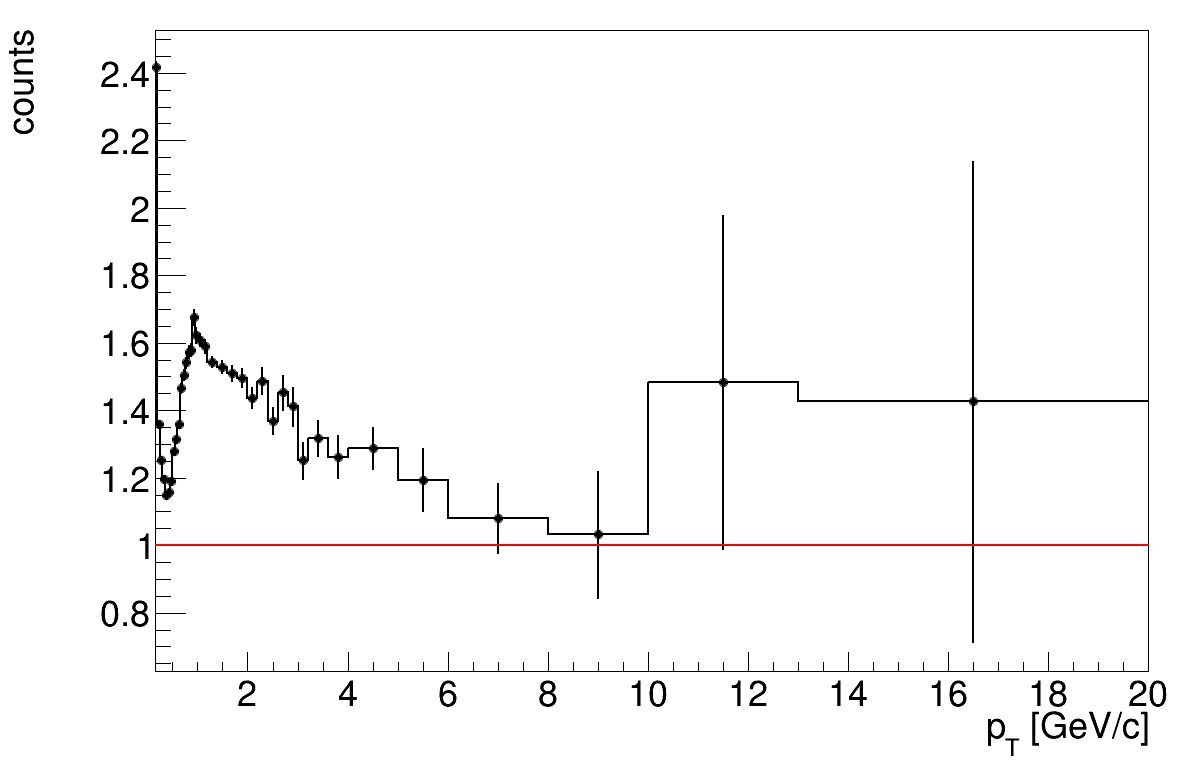

In [123]:
ratio_counts = h.Clone()
ratio1 = data.Clone()
ratio_counts.Divide(data)
ratio1.Divide(data)

c= ROOT.TCanvas('c','c',1200,800)

ratio_counts.Draw("histe")
ratio1.Draw('histsame')
c.Draw()
#c.SaveAs("datavsPubRatio.png")

0.0
3.0


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


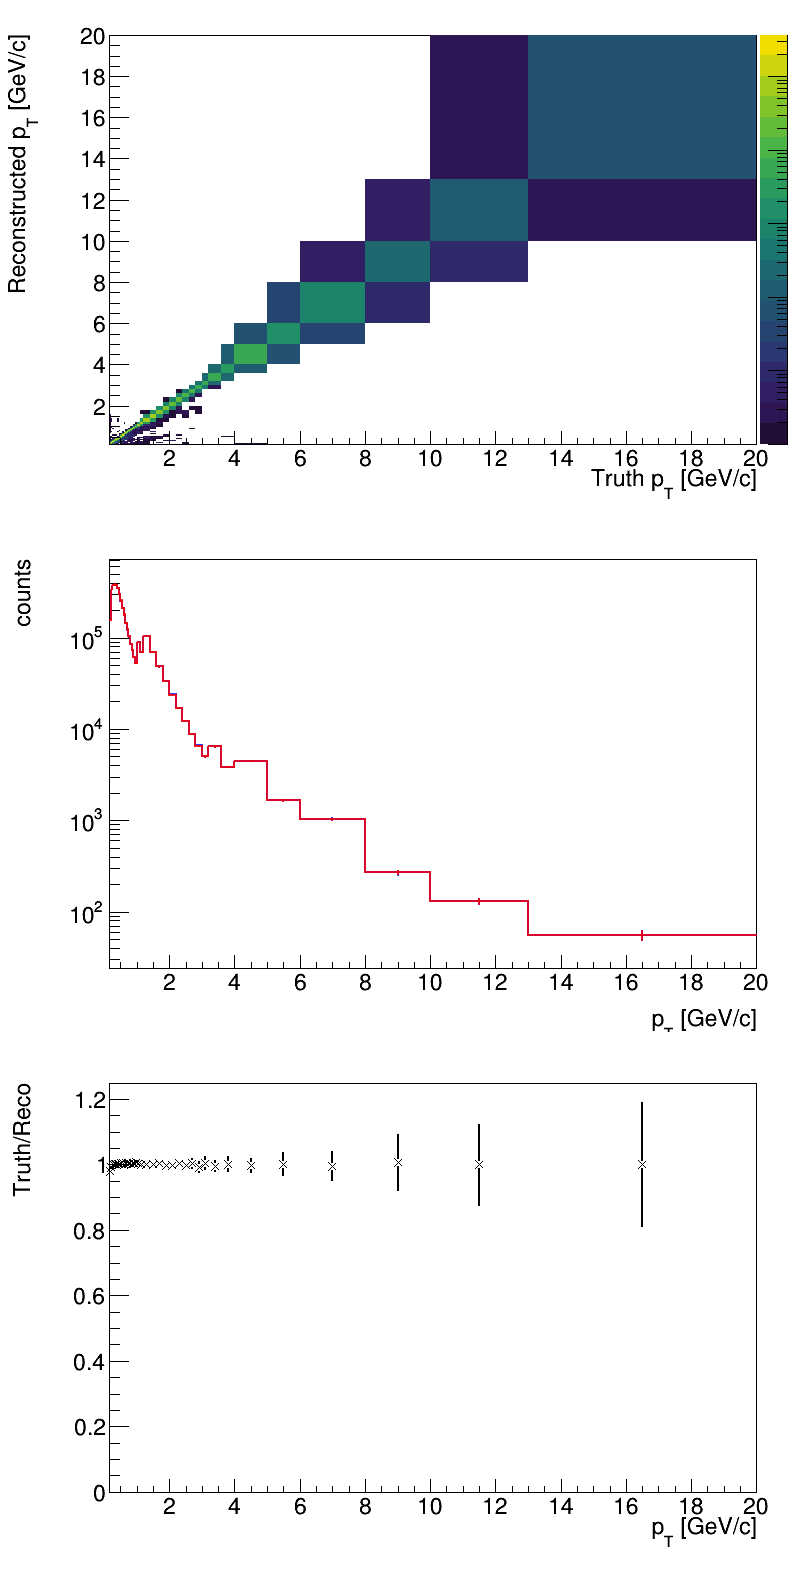

In [124]:
responseMatrix_counts = MCfile.Get("hCorrelation");
responseMatrix_counts.SetTitle(';Truth p_{T} [GeV/c];Reconstructed p_{T} [GeV/c]')

print (responseMatrix_counts.GetBinContent(0,0))
print (responseMatrix_counts.GetBinContent(responseMatrix_counts.GetNbinsX()+1,responseMatrix_counts.GetNbinsY()+1))
        
mc_truth_counts = responseMatrix_counts.ProjectionX()
mc_reco_counts = responseMatrix_counts.ProjectionY()


mc_truth_counts.SetLineColorAlpha(2,0.8)
mc_reco_counts.SetLineColorAlpha(4,0.8)

##draw mc truth, mc reco, response matrix
c = ROOT.TCanvas('c','c',800,1600)
c.Divide(1,3)
c.cd(1)
#responseMatrix_counts.GetXaxis().SetRangeUser(1,15)
#responseMatrix_counts.GetYaxis().SetRangeUser(1,15)
responseMatrix_counts.Draw('colz')
ROOT.gPad.SetLogz()
c.cd(2)

#label = Legend("")
#label.Add(mc_reco_counts,'MC Reco','L')
#label.Add(mc_truth_counts,'MC True','L')
#mc_reco_counts.GetXaxis().SetRangeUser(1,30)
#mc_truth_counts.GetXaxis().SetRangeUser(1,30)
#hs_mc = ROOT.THStack()
#hs_mc.Add(mc_reco)
#hs_mc.Add(mc_truth)
#hs_mc.Draw('nostacke')
mc_reco_counts.SetTitle('; p_{T} [GeV/c]; counts')
mc_reco_counts.Draw('histe')
mc_truth_counts.SetTitle('; p_{T} [GeV/c]; counts')
mc_truth_counts.Draw('histesame')


#label.Draw(0.5,.87)
ROOT.gPad.SetLogy()
c.cd(3)
ratio_mc_counts = mc_truth_counts.Clone()
ratio_mc_counts.SetMinimum(0.0)
ratio_mc_counts.SetLineColor(1)
ratio_mc_counts.SetMarkerStyle(5)
#ratio_mc_counts.GetXaxis().SetRangeUser(1,30)
ratio_mc_counts.Divide(mc_reco_counts)
ratio_mc_counts.Draw('e')
ratio_mc_counts.SetTitle(' ; p_{T} [GeV/c]; Truth/Reco')
c.Update()
c.Draw()

#c.SaveAs('Matrix_tracking_its_MBMC_1GeV15GeV.png')
#c.SaveAs('reWeighted_response_pPb.png')

#for i in range(ratio_mc.GetNbinsX()+1):
#    low = ratio_mc.GetBinLowEdge(i)
#    center =   ratio_mc.GetBinCenter(i)
#    high = ratio_mc.GetBinLowEdge(i+1)
#    content =  ratio_mc.GetBinContent(i)
#    print low, '\t', center, '\t', high, '\t',content





****************************************
Minimizer is Linear
Chi2                      =      68.7734
NDf                       =           13
p0                        =     0.698514   +/-   0.00301284  


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file EfficiencyAndFakeRate_tracking_tpc_15n_noteCuts.png has been created


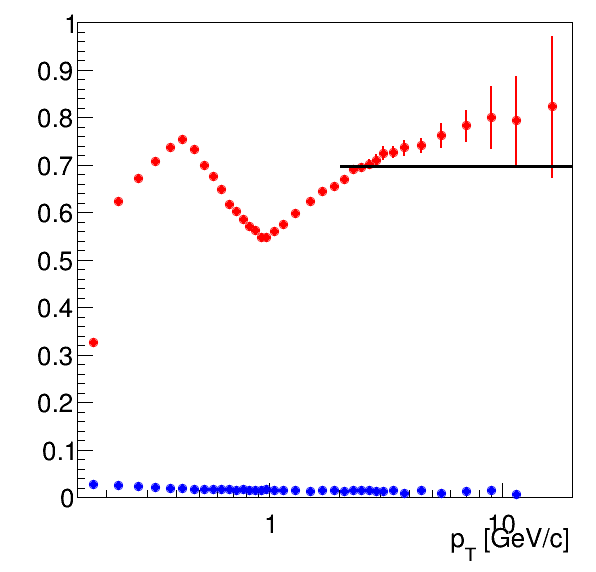

In [5]:
#Get efficiency and fake rate
efficiency = MCfile.Get("hRecoTruth").Clone()#MCfile.Get("Efficiency")
efficiency.Divide(MCfile.Get("hTruth"))
fakerate   = MCfile.Get("FakeRate")

#Plot efficiency and fake rate
efficiency.SetTitle(' ; p_{T} [GeV/c];')
efficiency.SetMinimum(0.0)
efficiency.SetMaximum(1.)
efficiency.SetMarkerStyle(20)
efficiency.SetMarkerColor(2)
efficiency.SetLineColor(2)
#efficiency.GetXaxis().SetRangeUser(1,30)
fakerate.SetMarkerStyle(20)
fakerate.SetLineColor(4)
fakerate.SetMarkerColor(4)

c = ROOT.TCanvas('c','c',600,600)
c.SetLogx()
efficiency.Fit('pol0', '', '', 2,20)
efficiency.Draw()
fakerate.Draw('same')

#label = Legend("MC: 13b2_efix_p1")
#label = Legend("")
#label.Add(efficiency,'Efficiency','L')
#label.Add(fakerate,'Fake rate','L')
#label.Draw(.25,.61)
c.Draw()
#c.SaveAs('EfficiencyAndFakeRate_tracking_its_0GeV15GeV_notecuts.pdf')
#c.SaveAs('EfficiencyAndFakeRate_tracking_tpc_15n_noteCuts.png')

sum = 0.0
for i in range(1,efficiency.GetNbinsX()+1):
    low = efficiency.GetBinLowEdge(i)
    center =   efficiency.GetBinCenter(i)
    high = efficiency.GetBinLowEdge(i+1)
    content =  efficiency.GetBinContent(i)
    error =  efficiency.GetBinError(i)
    #print (low, '\t', center, '\t', high, '\t', content, '\t', error, '\t', error/content)
    #sum += (error/content)**2

print ("\n\n")

for i in range(1,fakerate.GetNbinsX()+1):
    low = fakerate.GetBinLowEdge(i)
    center =   fakerate.GetBinCenter(i)
    high = fakerate.GetBinLowEdge(i+1)
    content =  fakerate.GetBinContent(i)
    error =  fakerate.GetBinError(i)
    #print (low, '\t', center, '\t', high, '\t',content, '\t', error, '\t', error/content)

In [126]:
for i in range(responseMatrix_counts.GetNbinsX()+2):
    ySliceSum = float(0.0)
    for j in range(responseMatrix_counts.GetNbinsY()+2):
        tempCont = responseMatrix_counts.GetBinContent(i, j)
        ySliceSum += tempCont
    print ("ySliceSum = ", ySliceSum, "bin: ", i)
    for j in range (responseMatrix_counts.GetNbinsY()+2):
        tempCont = responseMatrix_counts.GetBinContent(i, j)
        if(ySliceSum != 0.0):
            newCont = tempCont/ySliceSum
            responseMatrix_counts.SetBinContent(i, j, newCont)
        #print responseMatrix_counts.GetBinContent(i, j), "\t"
    #print "\n"

ySliceSum =  81.0 bin:  0
ySliceSum =  156724.0 bin:  1
ySliceSum =  337470.0 bin:  2
ySliceSum =  374424.0 bin:  3
ySliceSum =  382376.0 bin:  4
ySliceSum =  371969.0 bin:  5
ySliceSum =  345539.0 bin:  6
ySliceSum =  299453.0 bin:  7
ySliceSum =  254828.0 bin:  8
ySliceSum =  212966.0 bin:  9
ySliceSum =  179022.0 bin:  10
ySliceSum =  145808.0 bin:  11
ySliceSum =  122755.0 bin:  12
ySliceSum =  103053.0 bin:  13
ySliceSum =  85291.0 bin:  14
ySliceSum =  72954.0 bin:  15
ySliceSum =  61004.0 bin:  16
ySliceSum =  52755.0 bin:  17
ySliceSum =  89048.0 bin:  18
ySliceSum =  69999.0 bin:  19
ySliceSum =  104107.0 bin:  20
ySliceSum =  70081.0 bin:  21
ySliceSum =  48373.0 bin:  22
ySliceSum =  33457.0 bin:  23
ySliceSum =  23787.0 bin:  24
ySliceSum =  17104.0 bin:  25
ySliceSum =  12251.0 bin:  26
ySliceSum =  8857.0 bin:  27
ySliceSum =  6538.0 bin:  28
ySliceSum =  5045.0 bin:  29
ySliceSum =  6435.0 bin:  30
ySliceSum =  3860.0 bin:  31
ySliceSum =  4485.0 bin:  32
ySliceSum =  16

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


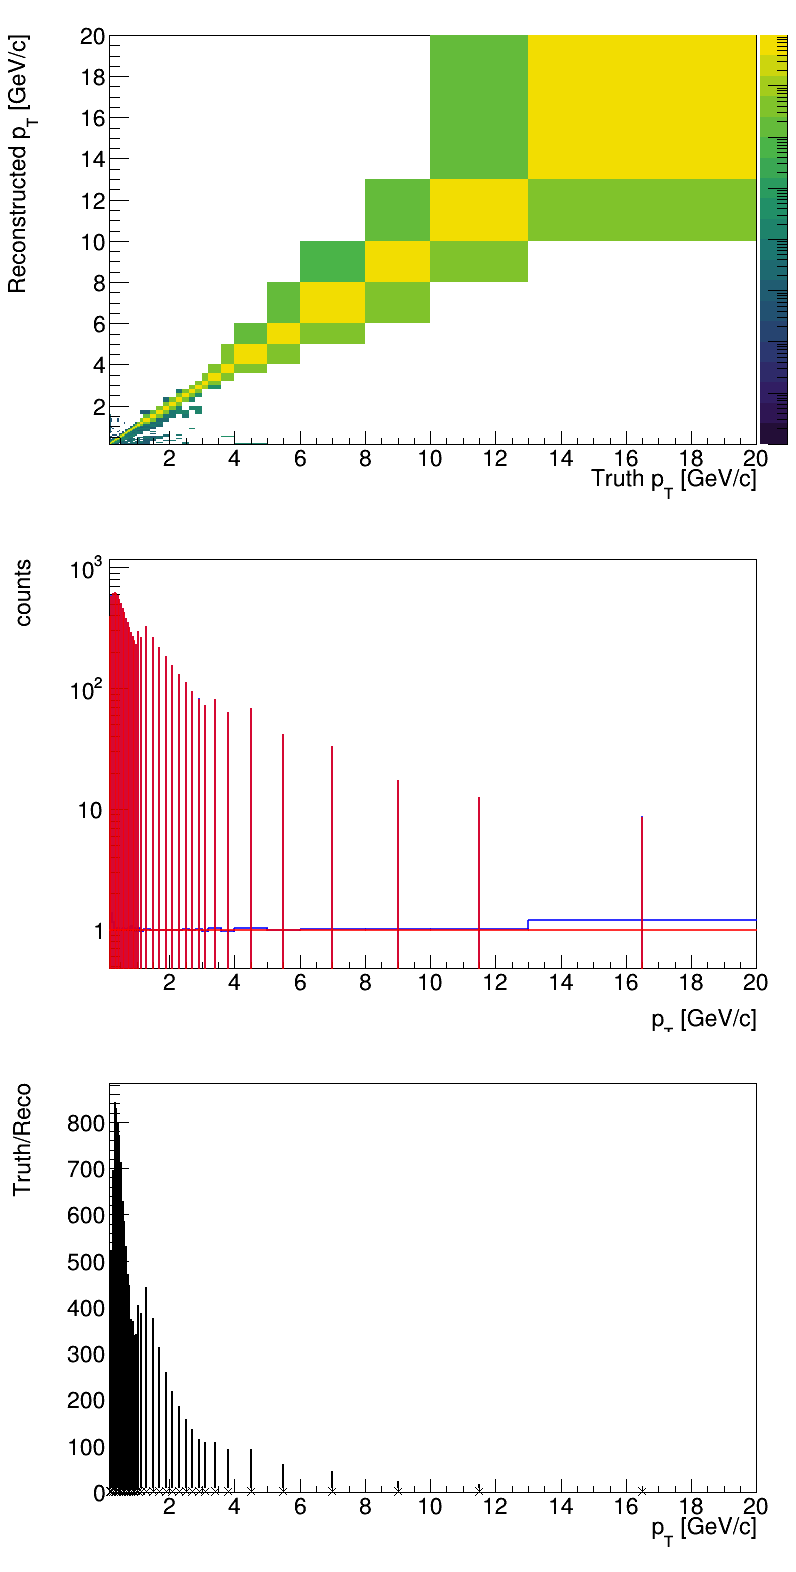

In [127]:
responseMatrix_counts_post = responseMatrix_counts.Clone()



mc_truth_counts_post = responseMatrix_counts.ProjectionX()
mc_reco_counts_post = responseMatrix_counts.ProjectionY()
mc_truth_counts_post.SetLineColorAlpha(2,0.8)
mc_reco_counts_post.SetLineColorAlpha(4,0.8)

c = ROOT.TCanvas('c','c',800,1600)
c.Divide(1,3)
c.cd(1)
responseMatrix_counts.SetMinimum(1e-8)
responseMatrix_counts.Draw('colz')
ROOT.gPad.SetLogz()
c.cd(2)

#label = Legend("")
#label.Add(mc_reco_counts_post,'MC Reco','L')
#label.Add(mc_truth_counts_post,'MC True','L')
#mc_reco_counts.GetXaxis().SetRangeUser(1,15)
#mc_truth_counts.GetXaxis().SetRangeUser(1,15)
mc_reco_counts_post.SetTitle('; p_{T} [GeV/c]; counts')
mc_reco_counts_post.Draw('histe')
mc_truth_counts_post.SetTitle('; p_{T} [GeV/c]; counts')
mc_truth_counts_post.Draw('histesame')

ratio_mc_counts_post = mc_truth_counts_post.Clone()
ratio_mc_counts_post.Divide(mc_reco_counts_post)

#label.Draw(0.5,.87)
ROOT.gPad.SetLogy()
c.cd(3)
ratio_mc_counts_post.SetMinimum(0.0)
ratio_mc_counts_post.SetLineColor(1)
ratio_mc_counts_post.SetMarkerStyle(5)
#ratio_mc_counts.GetXaxis().SetRangeUser(1,15)
ratio_mc_counts_post.Draw('e')
ratio_mc_counts_post.SetTitle(' ; p_{T} [GeV/c]; Truth/Reco')
c.Update()
c.Draw()

### Get and plot efficiency and fake rate

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


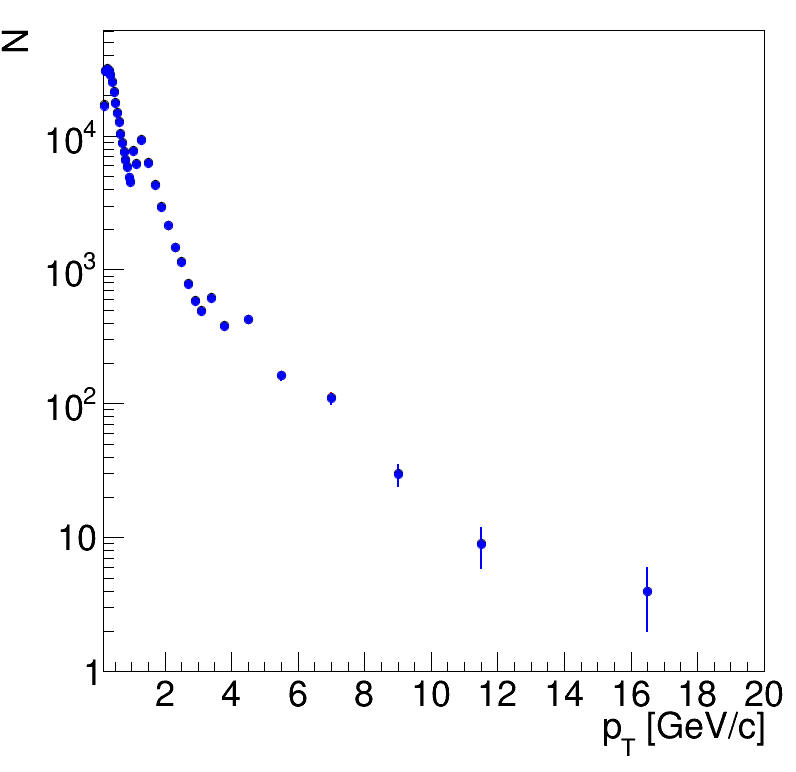

In [128]:
data_bkgsub = data.Clone()
for i in range(data_bkgsub.GetNbinsX()+1):
    bkg = data.GetBinContent(i)*fakerate.GetBinContent(i)
    data_bkgsub.SetBinContent(i,data.GetBinContent(i)-bkg)

c = ROOT.TCanvas('c','c',800,800)
#data.GetXaxis().SetRangeUser(1,30)
data.Draw('e')
data_bkgsub.SetLineColor(ROOT.kBlue)
data_bkgsub.SetMarkerColor(ROOT.kBlue)
data_bkgsub.SetMarkerStyle(20)

data_bkgsub.Draw('esame')
ROOT.gPad.SetLogy()
#label = Legend("Data: 13b, MC:13b2_efix_p1")
#label.Add(data,'data raw','L')
#label.Add(data_bkgsub,'data, fakes subtracted','L')
#label.Draw(.25,.85)
c.Draw()
#c.SaveAs('FakeRate_sub_tracking_its_MBMC_1GeV15GeV.pdf')


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


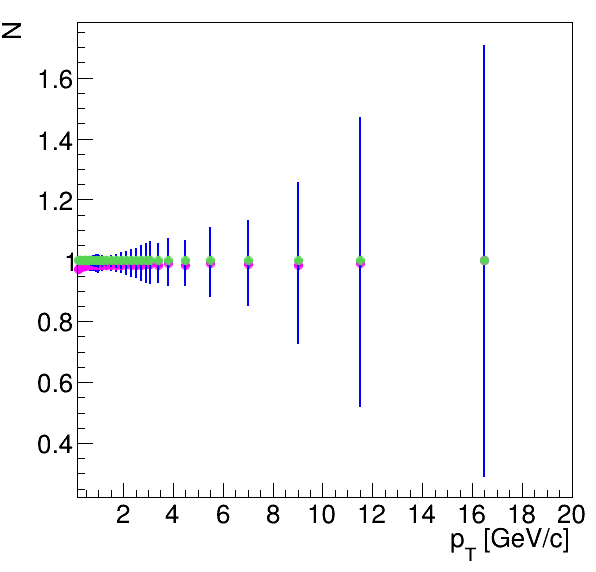

In [129]:
ratio_fkrate = data_bkgsub.Clone()
ratio_fkrate.Divide(data)
ratio_fkrate.SetMarkerColor(6)
one = ratio_fkrate.Clone()
one.Add(fakerate)
one.SetMarkerColor(8)

c = ROOT.TCanvas('c','c',600,600)
ratio_fkrate.Draw('e')
fakerate.Draw('same')
one.Draw('same')


c.Draw()

# Refolding

In [130]:
##refolding the distribution:
def applyEfficiencyUnCorrection(histo):
    histo_corrected = histo.Clone()
    for i in range(1,histo.GetNbinsX()+1):
        pt = ROOT.Double()
        eff = ROOT.Double()
        #efficiency.GetPoint(i-1,pt,eff)
        #print pt, eff
        eff = efficiency.GetBinContent(i)
        histo_corrected.SetBinContent(i,histo.GetBinContent(i)*eff)
        print (histo.GetBinContent(i)*eff, '\t', i)
        histo_corrected.SetBinError(i,histo.GetBinError(i)*eff)
    return histo_corrected
        

# h=published data 
h_wEff = applyEfficiencyUnCorrection(h)
h_wEff.SetLineColor(ROOT.kRed)
N = h_wEff.GetNbinsX()
#print N
#print h_wEff.GetBinContent(0)

data_refolded= h_wEff.Clone()#data_unfolded['SVD9'].Clone()
data_refolded.SetLineColorAlpha(4,0.5)

for ireco in range(N+2):
    temp = 0
    for itruth in range(N+2):
       #print responseMatrix_counts.GetBinContent(itruth,ireco)
        #print data_unfolded['SVD'].GetBinContent(itruth)
        temp += responseMatrix_counts.GetBinContent(itruth,ireco)*h_wEff.GetBinContent(itruth)
    data_refolded.SetBinContent(ireco, temp)

#data_refolded.Scale(h_wEff.Integral()/data_refolded.Integral())
print (h.Integral())
print (h_wEff.Integral())
print (data_refolded.Integral())


13520.269454383291 	 1
26407.593121803366 	 2
26995.918598890305 	 3
26107.870649083517 	 4
24392.24080626131 	 5
22161.367097630166 	 6
18962.499838236836 	 7
15850.861297555617 	 8
13395.75353446335 	 9
11291.612067909446 	 10
9464.217909523984 	 11
8106.30540786311 	 12
6956.8688962117885 	 13
6000.909255765146 	 14
5233.885556487367 	 15
4534.5490793753415 	 16
4052.458675470203 	 17
6998.914703869959 	 18
5731.644579561544 	 19
8648.069358954672 	 20
6010.82045792049 	 21
4197.433204335597 	 22
2938.670902583428 	 23
2086.8112090966897 	 24
1523.8688243469514 	 25
1097.6085169497746 	 26
804.0303239880086 	 27
595.7281696529353 	 28
452.7918393640721 	 29
598.0094795190307 	 30
357.1416203631543 	 31
410.50838147148534 	 32
148.55490517827639 	 33
93.97365178080645 	 34
24.779913699327608 	 35
10.595052758816792 	 36
4.698446558208218 	 37
454310.8846578598
286169.8349633217
286169.8352828026


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


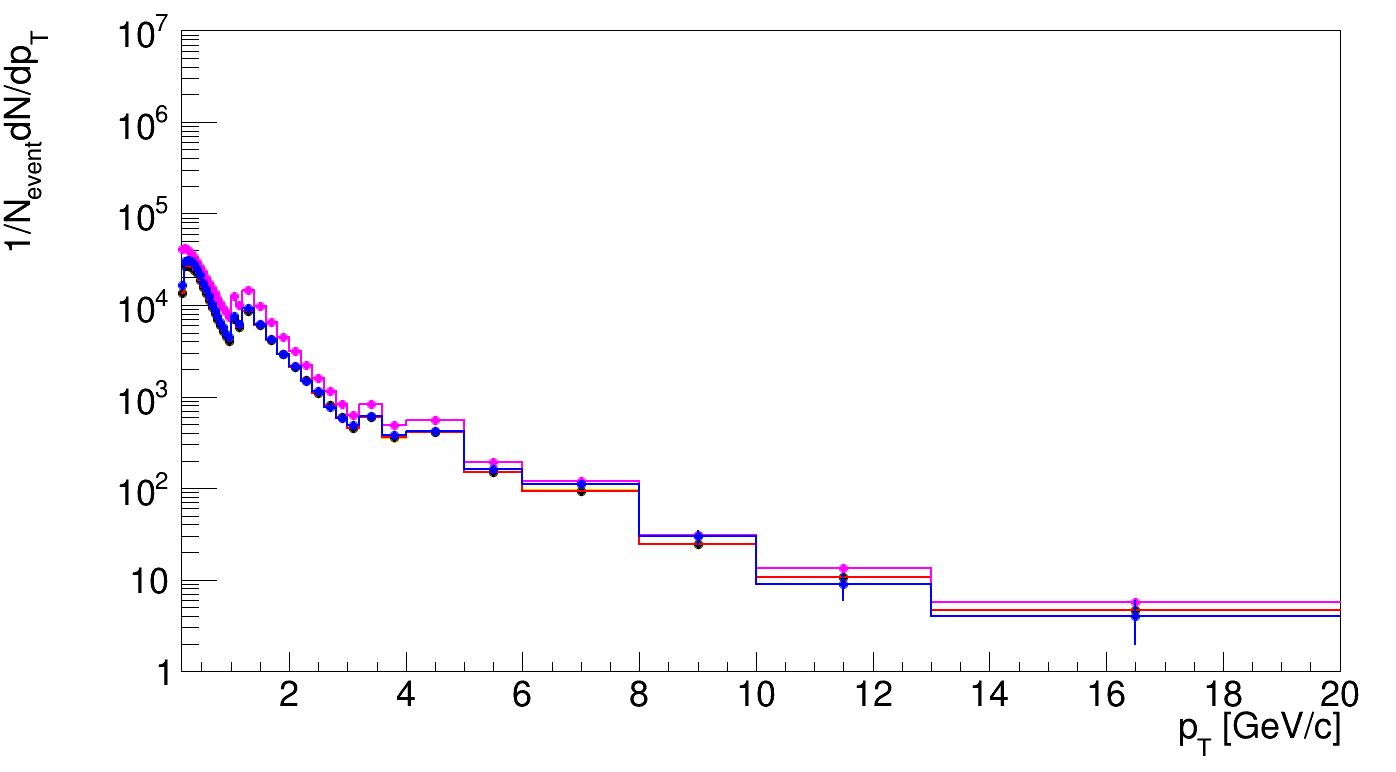

In [131]:
#plotting the refolded results
c= ROOT.TCanvas('c','c',1400,800)
h.SetLineColor(ROOT.kMagenta)
data_bkgsub.SetLineColor(ROOT.kBlue)
data_refolded.SetLineColor(ROOT.kOrange)
h.SetMarkerColor(ROOT.kMagenta)
data_bkgsub.SetMarkerColor(ROOT.kBlue)
data_refolded.SetMarkerColor(ROOT.kOrange)

data_refolded.SetTitle(";p_{T} [GeV/c];1/N_{event}dN/dp_{T}")

#data_refolded.GetXaxis().SetRangeUser(1,15)
data_refolded.GetYaxis().SetRangeUser(1,1e7)
data_refolded.Draw('histe')
h_wEff.Draw('histesame')
h.Draw('histesame')
data_bkgsub.Draw('histesame')


#label = Legend("Data: 15n, MC:16k5a")
#label.Add(h,'Published data','L')
#label.Add(h_wEff,'Published data x Eff','L')
#label.Add(data_refolded,'Response matrix x (published data x eff)','L')
#label.Add(data_bkgsub,'Fake Subtracted Measured data','L')
#label.Draw(.33,.85)

c.SetLogy()
c.Draw()
#c.SaveAs('refolding_pPb_its_MBMC_1GeV15GeV.pdf')

In [132]:
ratio_data_bkgsub = data_bkgsub.Clone()
ratio_data_refolded = data_refolded.Clone()
ratio_h_wEff = h_wEff.Clone()
ratio_h = h.Clone()

ratio_data_bkgsub.Divide(ratio_h)
ratio_data_refolded.Divide(ratio_h)
ratio_h_wEff.Divide(ratio_h)
ratio_h.Divide(ratio_h)

True

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


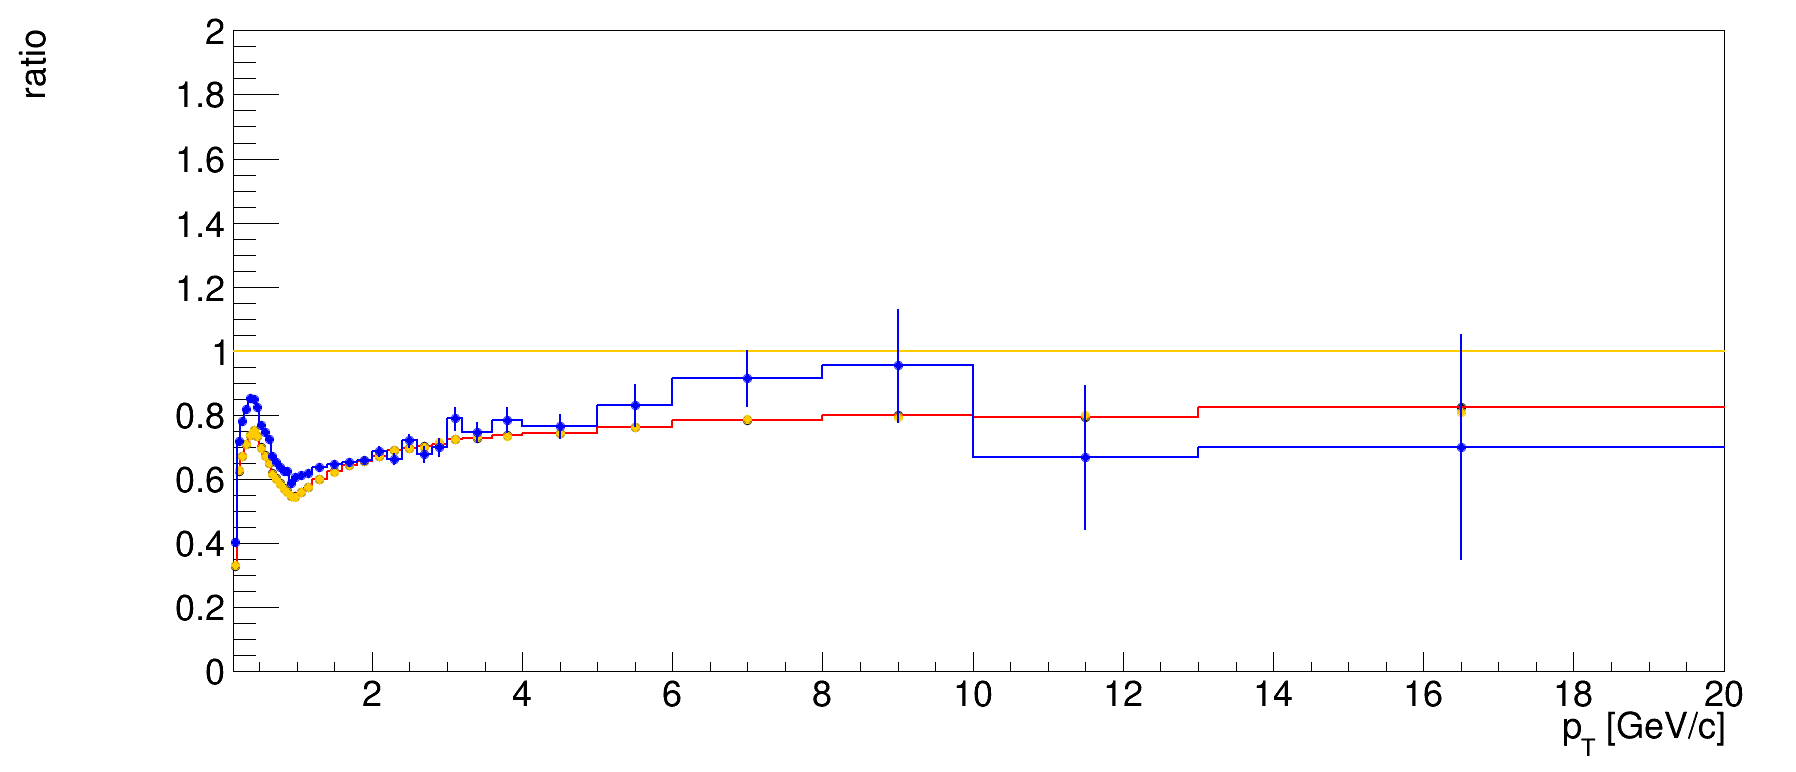

In [133]:
c= ROOT.TCanvas('c','c',1800,800)

ratio_h.SetTitle('; p_{T} [GeV/c]; ratio')
ratio_h.SetMaximum(2.0)
ratio_h.SetMinimum(0.0)
#ratio_h.GetXaxis().SetRangeUser(1,30)


ratio_h.Draw('hist')
ratio_h_wEff.Draw('histesame')
ratio_data_refolded.Draw('histesame')
ratio_data_bkgsub.Draw('histesame')

#label = Legend("Data: 15n_r244480, MC:16k5a")
#label.Add(ratio_h,'Unity','L')
#label.Add(ratio_h_wEff,'(Published data x Eff)/Published data','L')
#label.Add(ratio_data_refolded,'[Response matrix x (published data x eff)]/Published data','L')
#label.Add(ratio_data_bkgsub,'(Fake Subtracted Measured data)/Published data','L')
#label.Draw(.15,.85)


c.Draw()
#c.SaveAs('ratio_refolding_pp_1GeV20GeV_errors.pdf')
#c.SaveAs('ratio_pink_pPb_13b2.png')

In [134]:
ratio_refold_pub = h_wEff.Clone()
ratio_refold_pub.Divide(data_refolded)

ratio_refold_data_sub = data_bkgsub.Clone()
ratio_refold_data_sub.Divide(data_refolded)
#ratio_refold_data_sub.SetLineColor(ROOT.kBlue)
#ratio_refold_data_sub.SetMarkerColor(ROOT.kBlue)

ratio_refold_data = data.Clone()
ratio_refold_data.Divide(data_refolded)

#addFakes = ratio_refold_data_sub.Clone()
#addFakes.Add(fakerate)

print (ratio_refold_pub.Integral())

37.039997696876526


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file ratio_refolding_pp_tpc_usingCounts_data_publishedDataBinning_kINT7_onlyNoteCuts_15n_r244364_Zfirst.png has been created


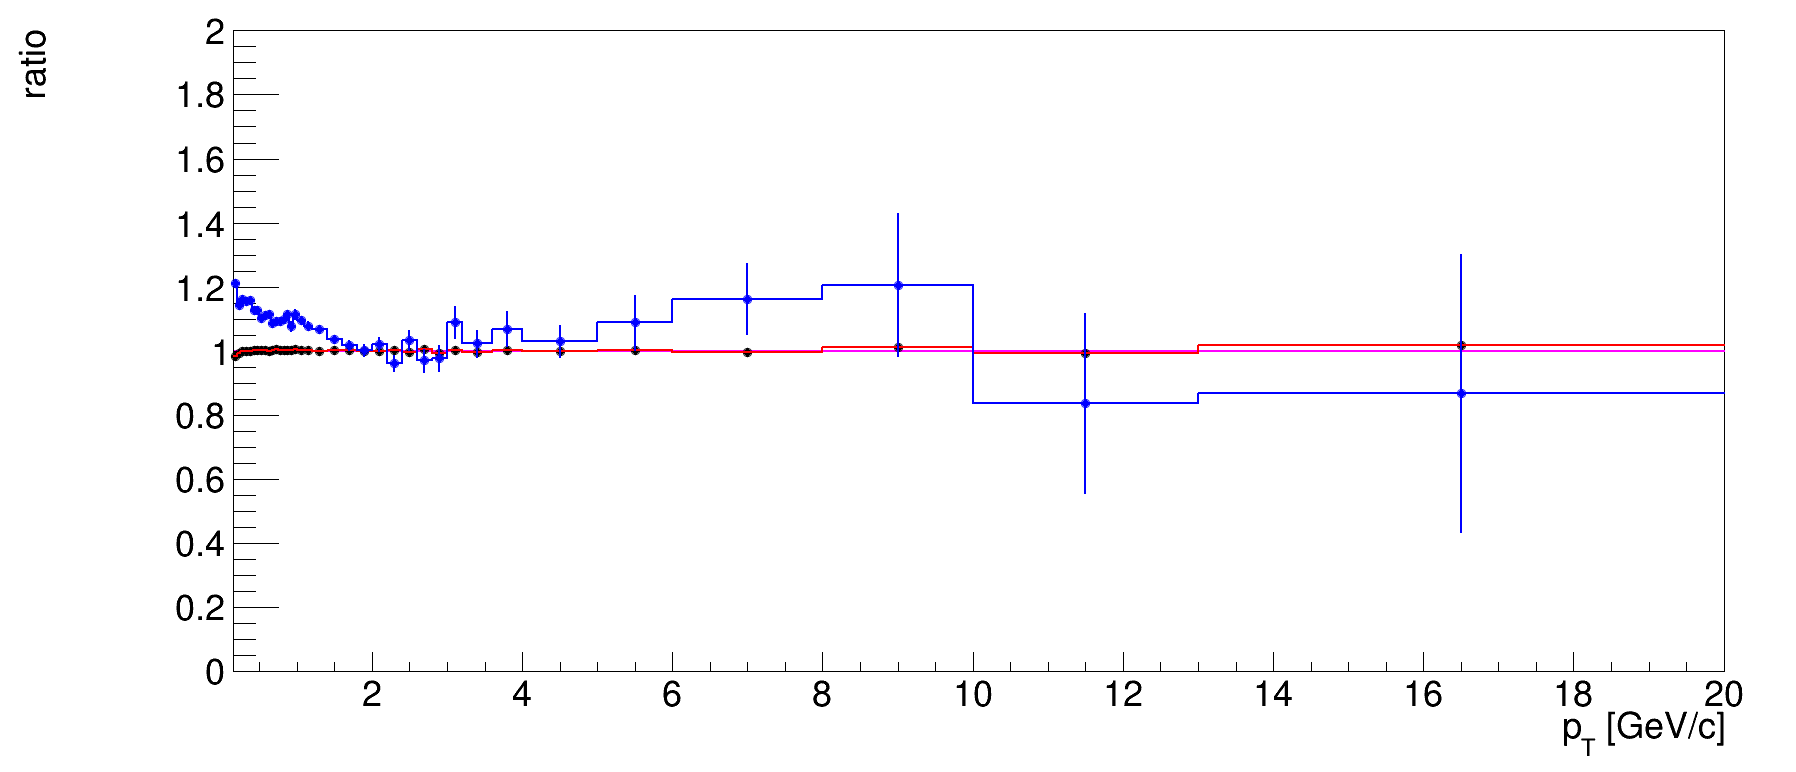

In [135]:
c= ROOT.TCanvas('c','c',1800,800)

#addFakes.SetLineColor(8)
#addFakes.SetMarkerColor(8)

ratio_unity = h.Clone()
ratio_unity.Divide(h)
ratio_unity.SetTitle('; p_{T} [GeV/c]; ratio')
ratio_unity.SetMaximum(2.0)
ratio_unity.SetMinimum(0.0)
#ratio_refold_unfoldedSVD.Draw('histsame')
#ratio_refold_data.Draw('histesame')
#ratio_unity.GetXaxis().SetRangeUser(1,30)
ratio_unity.Draw('hist')
ratio_refold_pub.Draw('histesame')
ratio_refold_data_sub.Draw('histesame')
#addFakes.Draw('histesame')

#label = Legend("Data: 15n_r244364 kINT7, MC:16ka")
#label.Add(ratio_refold_data,'raw data','L')
#label.Add(ratio_refold_pub,'(published data)/(response matrix x (published data)','L')
#label.Add(ratio_refold_data_sub,'fake subtracted measured data/(response matrix x (published data x eff))','L')
#label.Add(addFakes, "addFakes", 'L')
#label.Draw(.15,.85)


c.Draw()
#c.SaveAs('ratio_refolding_pp_its_MBMC_1GeV15GeV_errors.pdf')
#c.SaveAs('ratio_refolding_pp_tpc_usingCounts_data_publishedDataBinning_kINT7_onlyNoteCuts_15n_r244364_Zfirst.png')

In [38]:
for i in range(ratio_refold_data_sub.GetNbinsX()+1):
    low = ratio_refold_data_sub.GetBinLowEdge(i)
    center = ratio_refold_data_sub.GetBinCenter(i)
    high = ratio_refold_data_sub.GetBinLowEdge(i+1)
    content = ratio_refold_data_sub.GetBinContent(i)
    error = ratio_refold_data_sub.GetBinError(i+1)
    print i, '\t',content, '\t', error
    #print content

0 	0.0 	0.0800999932411
1 	1.24299836159 	0.0717334940215
2 	1.1695882082 	0.0705294757804
3 	1.13796913624 	0.0717353072432
4 	1.12485921383 	0.0745765477215
5 	1.12719118595 	0.0773451696778
6 	1.10414922237 	0.0812350300968
7 	1.0862057209 	0.0862765272089
8 	1.08491790295 	0.0908103336182
9 	1.06227469444 	0.0973058042105
10 	1.0737746954 	0.102405724809
11 	1.05457663536 	0.108287309747
12 	1.03827404976 	0.115497758857
13 	1.04267394543 	0.122105103512
14 	1.03038907051 	0.129636128661
15 	1.03169679642 	0.135392685791
16 	1.00432801247 	0.143620455732
17 	1.00358903408 	0.0553532408216
18 	1.00452470779 	0.0611494741563
19 	0.981632888317 	0.0254836951075
20 	0.989867210388 	0.0312435897373
21 	0.977072179317 	0.0381618993529
22 	0.985697448254 	0.045520202099
23 	0.959932029247 	0.0550478411242
24 	0.964037120342 	0.0644590106492
25 	0.93941450119 	0.0761828947852
26 	0.931014001369 	0.0887257163534
27 	0.914019703865 	0.106458006063
28 	0.958105862141 	0.120140307862
29 	0.914

In [33]:
nbinstrack = 37
track_bins = np.array([0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 
                       0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 
                       0.95, 1  , 1.1 , 1.2, 1.4 , 1.6, 1.8 , 2  , 
                       2.2 , 2.4, 2.6 , 2.8, 3   , 3.2, 3.6 , 4  , 
                       5   , 6  , 8   , 10 , 13  , 20], dtype='float64')
published_content = np.array([0.824726819992, 1.37687504292,  1.36605072021, 1.35540819168,  1.36373722553,
                              1.33998227119,  1.26481473446,  1.19979560375, 1.13147604465,  1.09028458595, 
                              1.01583135128,  0.973787844181, 0.95493388176, 0.933572292328, 0.916795551777, 
                              0.877655386925, 0.874309360981, 0.886777043343,0.893576085567, 0.937718093395, 
                              0.962498545647, 0.988897502422, 0.989428520203,1.03875303268,  1.04740440845, 
                              1.01672780514,  1.03704452515,  1.121571064,   1.01751768589,  1.11019670963, 
                              1.12302589417,  1.1331577301,   1.14455199242, 1.32073283195,  1.88675832748, 
                              0.964498341084, 1.03563582897], dtype='float64')
published_error = np.array([0.0927980307369,
0.0921350462453,
0.093886900053,
0.097803614002,
0.101590927872,
0.104516971544,
0.108176732604,
0.111744327707,
0.116906318166,
0.119834482663,
0.125037282075,
0.131786750329,
0.138577568623,
0.145704167738,
0.150905505586,
0.159829368237,
0.0620089107431,
0.0695613937356,
0.0295726024512,
0.036972424343,
0.0455737132233,
0.055100734192,
0.0681268083972,
0.0811511349399,
0.0949213757228,
0.112681677187,
0.137330876305,
0.151102503915,
0.0686179550453,
0.0896074181171,
0.0334242148512,
0.0570814361966,
0.0385751992315,
0.094790705599,
0.0638739937904,
0.0427077174635,
0.0], dtype='float64')
cutsh = ROOT.TH1F('cutsh','', nbinstrack, track_bins)
for i in range(nbinstrack):
    cutsh.SetBinContent(i+1, published_content[i])
    cutsh.SetBinError(i+1, published_error[i])
    


In [45]:
nbinstrack = 37
track_bins = np.array([0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 
                       0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 
                       0.95, 1  , 1.1 , 1.2, 1.4 , 1.6, 1.8 , 2  , 
                       2.2 , 2.4, 2.6 , 2.8, 3   , 3.2, 3.6 , 4  , 
                       5   , 6  , 8   , 10 , 13  , 20], dtype='float64')
published_content = np.array([1.24299836159,
1.1695882082,
1.13796913624,
1.12485921383,
1.12719118595,
1.10414922237,
1.0862057209,
1.08491790295,
1.06227469444,
1.0737746954,
1.05457663536,
1.03827404976,
1.04267394543,
1.03038907051,
1.03169679642,
1.00432801247,
1.00358903408,
1.00452470779,
0.981632888317,
0.989867210388,
0.977072179317,
0.985697448254,
0.959932029247,
0.964037120342,
0.93941450119,
0.931014001369,
0.914019703865,
0.958105862141,
0.914411365986,
0.960720777512,
0.951203107834,
0.95999699831,
1.03015935421,
1.09300863743,
1.58002722263,
0.814161002636,
0.874210119247], dtype='float64')

published_error = np.array([0.0717334940215,
0.0705294757804,
0.0717353072432,
0.0745765477215,
0.0773451696778,
0.0812350300968,
0.0862765272089,
0.0908103336182,
0.0973058042105,
0.102405724809,
0.108287309747,
0.115497758857,
0.122105103512,
0.129636128661,
0.135392685791,
0.143620455732,
0.0553532408216,
0.0611494741563,
0.0254836951075,
0.0312435897373,
0.0381618993529,
0.045520202099,
0.0550478411242,
0.0644590106492,
0.0761828947852,
0.0887257163534,
0.106458006063,
0.120140307862,
0.0535380568563,
0.0691688506389,
0.0258066878328,
0.0454289336965,
0.0294493806964,
0.072814473476,
0.0492710926904,
0.0331146207667,
251905.117745], dtype='float64')
trigh = ROOT.TH1F('trigh','', nbinstrack, track_bins)
for i in range(nbinstrack):
    trigh.SetBinContent(i+1, published_content[i])
    trigh.SetBinError(i+1, published_error[i])

Warning in <TFile::Append>: Replacing existing TH1: trigh (Potential memory leak).


Chi2 = 70.688793, Prob = 8.94082e-06, NDF = 27, igood = 0
Chi2 = 53.848500, Prob = 0.00158768, NDF = 27, igood = 0


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


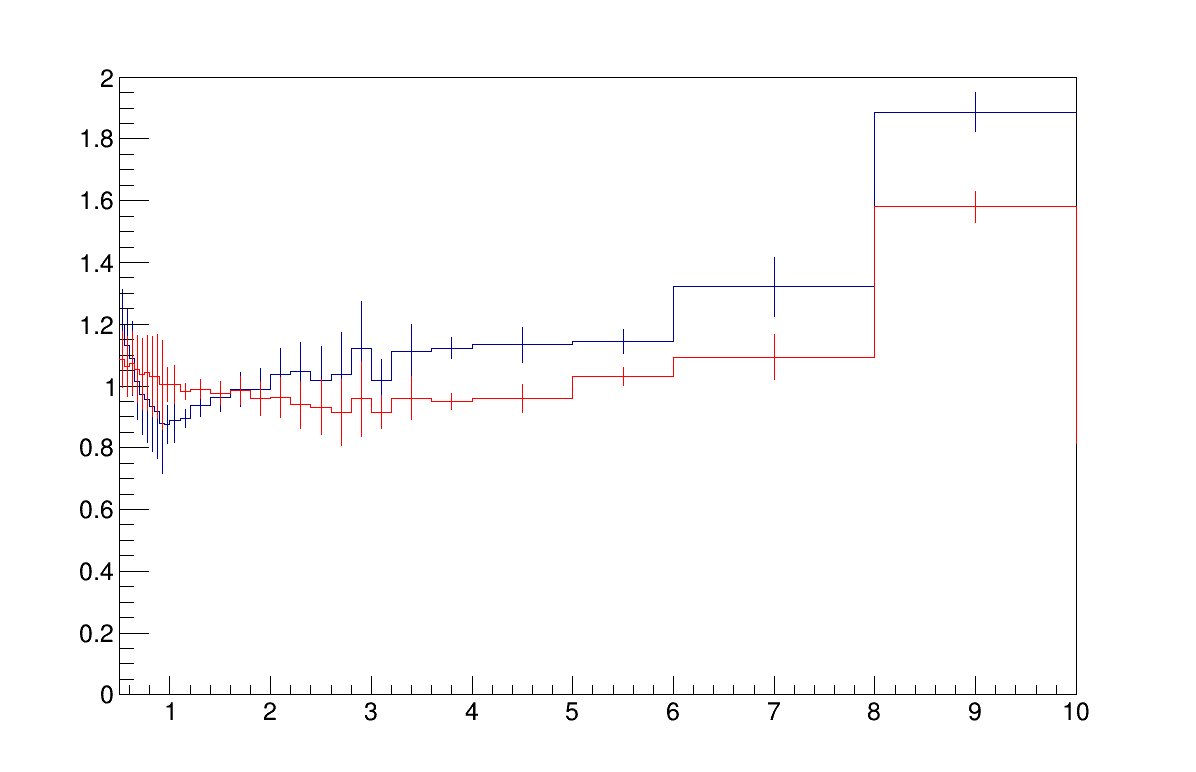

In [54]:
cutsh.GetYaxis().SetRangeUser(0,2)
cutsh.GetXaxis().SetRangeUser(0.5, 10)
trigh.SetLineColor(2)
c= ROOT.TCanvas('c','c',1200,800)
cutsh.Draw('histe')
trigh.Draw('histesame')
c.Draw()


pvalUU = cutsh.Chi2Test(trigh, "UU NORM P")
#pvalUW = trigh.Chi2Test(cutsh, "UW P")
pvalWW = cutsh.Chi2Test(trigh, "WW P")
#pvalUUwUO = cutsh.Chi2Test(trigh, "UU NORM P OF UF")
#pvalWWwUO = cutsh.Chi2Test(trigh, "WW P  OF UF")
